***Importé las librerias***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

***Cargo Dataframe y visualizo la información que tiene***

In [6]:
df = pd.read_csv(r"C:\Users\salva\Desktop\Data Science The Bridge\Data Science clase GitHub\DATA ESTEFY 2025\ML_ESTEFANY\ML_Prediccion-del-Precio-Real-de-Productos-en-Amazon\scr\data_sample\Amazon.csv")

In [8]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [12]:
df.shape

(1465, 16)

***Quito los simbolos para que quede los datos iguales y sean numericos***

In [15]:
cols_to_clean = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace("₹", "").str.replace(",", "").str.replace("%", "").str.strip()
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

In [17]:
print(df[["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]].describe())

       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.304394   10874.826864            21.635905     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4295.000000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000  


***Veo los histogramas de las columnas principales***

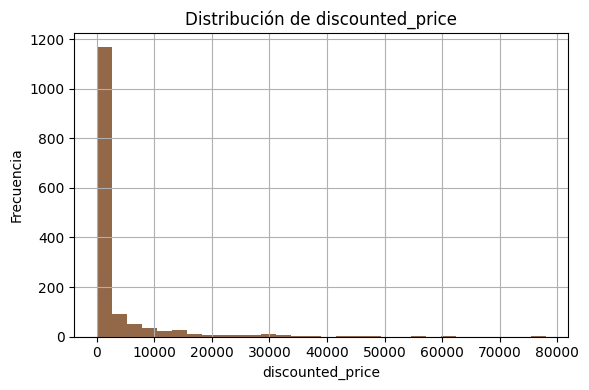

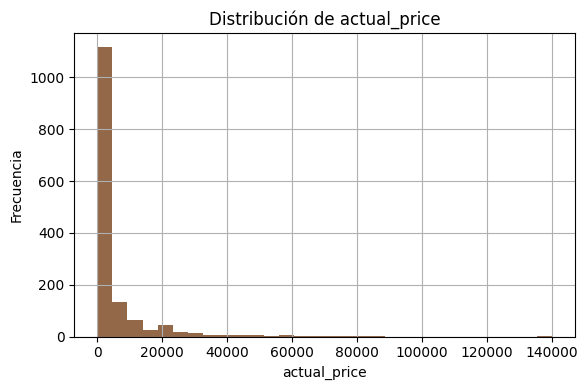

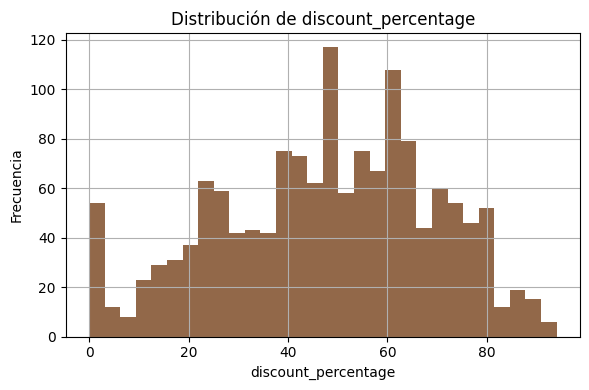

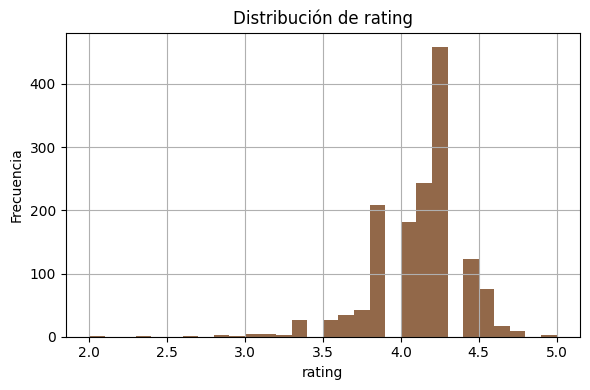

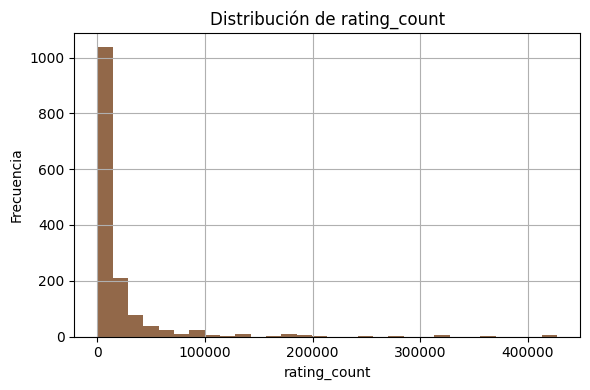

In [20]:
numeric_cols = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=30,color="#926849")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

***Ahora utilizamos actual_price como target***

In [23]:
X = df.drop(columns=["actual_price"])
y = df["actual_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1172, 15), (293, 15), (1172,), (293,))

***Veo la lista de valores unicos***

In [26]:
feature_sample = pd.DataFrame({"Tipo de dato": X_train.dtypes,
    "Ejemplo valor": X_train.iloc[0],
    "Valores únicos": X_train.nunique()}).sort_values(by="Valores únicos", ascending=False)

print(feature_sample)

                    Tipo de dato  \
product_link              object   
img_link                  object   
product_id                object   
product_name              object   
about_product             object   
review_content            object   
user_id                   object   
user_name                 object   
review_id                 object   
review_title              object   
rating_count             float64   
discounted_price         float64   
category                  object   
discount_percentage        int64   
rating                   float64   

                                                         Ejemplo valor  \
product_link         https://www.amazon.in/ROYAL-STEP-Portable-Elec...   
img_link             https://m.media-amazon.com/images/I/519LLyO+jt...   
product_id                                                  B0BNQMF152   
product_name         ROYAL STEP Portable Electric USB Juice Maker J...   
about_product        ROYAL STEP Portables & Convenien

In [28]:
cols_utiles = ["discounted_price",
    "discount_percentage","rating",
    "rating_count","category"]

X_train_clean = X_train[cols_utiles].copy()
X_test_clean = X_test[cols_utiles].copy()


X_train_clean.head()

,discounted_price,discount_percentage,rating,rating_count,category
1451,499.0,77,3.7,53.0,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1340,13999.0,44,4.2,32840.0,"Electronics|HomeTheater,TV&Video|Televisions|S..."
254,440.0,0,4.5,8610.0,OfficeProducts|OfficeElectronics|Calculators|B...
1167,970.0,51,4.4,184.0,Computers&Accessories|Accessories&Peripherals|...
1239,32999.0,31,4.3,4703.0,"Electronics|HomeTheater,TV&Video|Televisions|S..."


***Ver los valores nulos***

In [31]:
missing_train = X_train_clean.isnull().sum()
missing_test = X_test_clean.isnull().sum()

missing_summary = pd.DataFrame({"Nulos en Train": missing_train,
    "Nulos en Test": missing_test})

missing_summary

,Nulos en Train,Nulos en Test
discounted_price,0,0
discount_percentage,0,0
rating,1,0
rating_count,2,0
category,0,0


***Eliminar y verificar que no esten los valores nulos***

In [34]:
rating_mean = X_train_clean["rating"].mean()
rating_count_median = X_train_clean["rating_count"].median()

X_train_clean["rating"].fillna(rating_mean, inplace=True)
X_train_clean["rating_count"].fillna(rating_count_median, inplace=True)

X_train_clean.isnull().sum()

C:\Users\salva\AppData\Local\Temp\ipykernel_17632\125925126.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_clean["rating"].fillna(rating_mean, inplace=True)
C:\Users\salva\AppData\Local\Temp\ipykernel_17632\125925126.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



discounted_price       0
discount_percentage    0
rating                 0
rating_count           0
category               0
dtype: int64

***Codifico los valores seleccionados***

In [37]:
X_train_clean['main_category'] = X_train_clean['category'].str.split('|').str[0]
X_test_clean['main_category'] = X_test_clean['category'].str.split('|').str[0]

X_train_encoded = pd.get_dummies(X_train_clean.drop(columns=["category"]), columns=["main_category"])
X_test_encoded = pd.get_dummies(X_test_clean.drop(columns=["category"]), columns=["main_category"])

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

X_train_encoded.head()

,discounted_price,discount_percentage,rating,rating_count,main_category_Computers&Accessories,main_category_Electronics,main_category_Health&PersonalCare,main_category_Home&Kitchen,main_category_HomeImprovement,main_category_MusicalInstruments,main_category_OfficeProducts,main_category_Toys&Games
1451,499.0,77,3.7,53.0,False,False,False,True,False,False,False,False
1340,13999.0,44,4.2,32840.0,False,True,False,False,False,False,False,False
254,440.0,0,4.5,8610.0,False,False,False,False,False,False,True,False
1167,970.0,51,4.4,184.0,True,False,False,False,False,False,False,False
1239,32999.0,31,4.3,4703.0,False,True,False,False,False,False,False,False


***Entreno el modelo y muestro los resultados***

In [40]:
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

y_pred = lr_model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

{"MAE (Error Absoluto Medio)": round(mae, 2),"RMSE (Raíz Error Cuadrático Medio)": round(rmse, 2),
    "R² (Coeficiente de Determinación)": round(r2, 4)}

{'MAE (Error Absoluto Medio)': 1231.64,
 'RMSE (Raíz Error Cuadrático Medio)': 1894.73,
 'R² (Coeficiente de Determinación)': 0.9569}

***Pruebo con 3 modelos para ver cual es el mejor***

In [43]:
models = {"LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)}

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train_encoded,
        y_train,
        cv=5,
        scoring="neg_root_mean_squared_error")
    rmse_scores = -scores
    cv_results[name] = {
        "RMSE promedio": round(rmse_scores.mean(), 2),
        "RMSE std (variabilidad)": round(rmse_scores.std(), 2)}

cv_results

{'LinearRegression': {'RMSE promedio': 2827.7,
  'RMSE std (variabilidad)': 336.41},
 'RandomForest': {'RMSE promedio': 2435.18,
  'RMSE std (variabilidad)': 1490.85},
 'GradientBoosting': {'RMSE promedio': 2009.9,
  'RMSE std (variabilidad)': 1399.06}}

***Utilizo el GrandientBoostingRegressor por dar mejor resultado y busco cuales aon los mejores hiperparametros y los aplico***

In [45]:
gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {"n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5]}

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1)

grid_search.fit(X_train_encoded, y_train)

best_rmse = -grid_search.best_score_
best_params = grid_search.best_params_

best_rmse, best_params

Fitting 5 folds for each of 27 candidates, totalling 135 fits


(1907.6527510206251,
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300})

In [46]:
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=300,
    random_state=42)

best_gb_model.fit(X_train_encoded, y_train)

y_pred_opt = best_gb_model.predict(X_test_encoded)

error_absoluto = np.abs(y_test - y_pred_opt)
error_relativo = error_absoluto / y_test

errores_df = pd.DataFrame({
    "Precio real": y_test,
    "Precio predicho": y_pred_opt,
    "Error absoluto": error_absoluto,
    "Error relativo (%)": error_relativo * 100}).sort_values(by="Error absoluto", ascending=False)

print(errores_df.head(10))

      Precio real  Precio predicho  Error absoluto  Error relativo (%)
1393      85000.0     73146.149121    11853.850879           13.945707
1379      65000.0     71823.518174     6823.518174           10.497720
858       29999.0     34264.369436     4265.369436           14.218372
1243      34990.0     38064.059201     3074.059201            8.785536
680       32000.0     29372.129708     2627.870292            8.212095
482       39990.0     42114.572441     2124.572441            5.312759
1392       8999.0     11074.699340     2075.699340           23.065889
1455       9999.0     11929.422732     1930.422732           19.306158
668       15990.0     14712.870766     1277.129234            7.987050
247        9995.0     11006.303937     1011.303937           10.118098


***Creo los graficos***

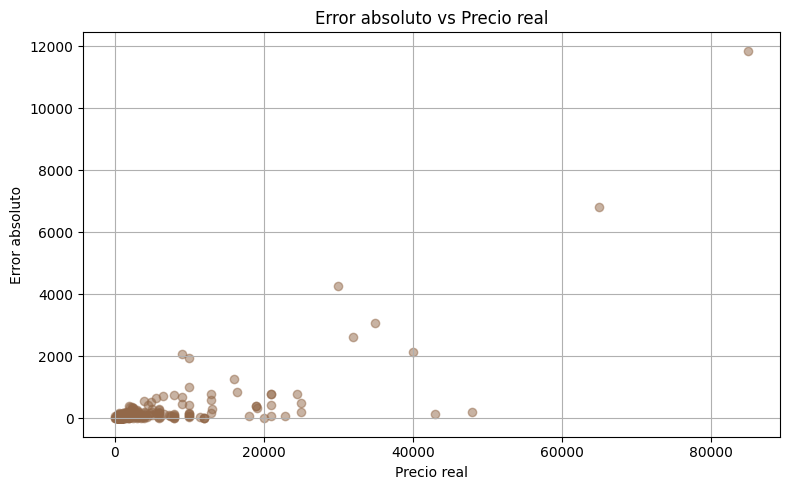

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, np.abs(y_test - y_pred_opt), alpha=0.5,color="#926849")
plt.xlabel("Precio real")
plt.ylabel("Error absoluto")
plt.title("Error absoluto vs Precio real")
plt.grid(True)
plt.tight_layout()
plt.show()

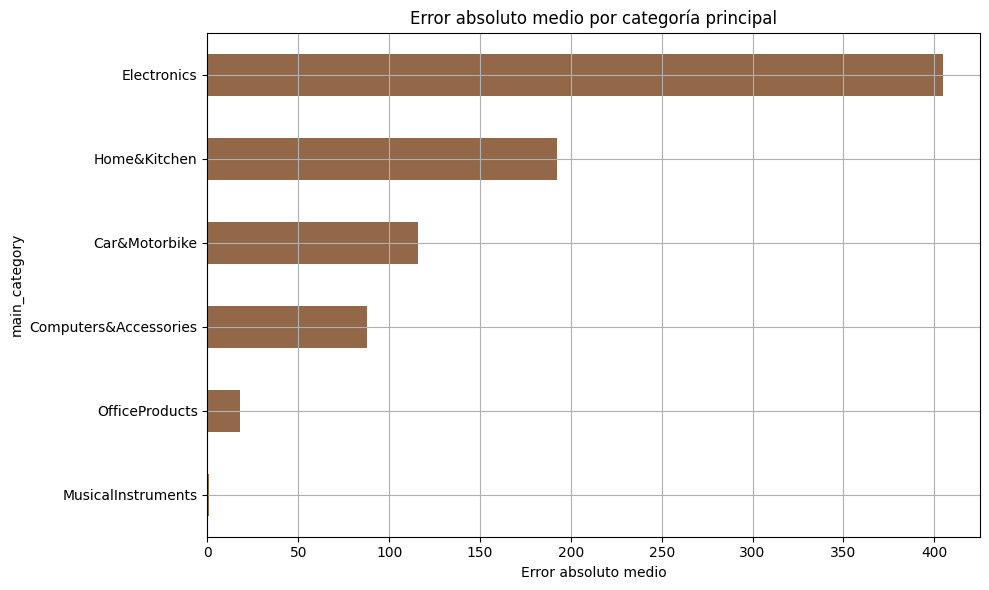

In [50]:
X_test_clean['main_category'] = X_test_clean['category'].str.split('|').str[0]

errores_por_categoria = pd.DataFrame({
    "main_category": X_test_clean['main_category'],
    "Precio real": y_test,
    "Precio predicho": y_pred_opt,
    "Error absoluto": np.abs(y_test - y_pred_opt)})

error_categoria_mean = errores_por_categoria.groupby("main_category")["Error absoluto"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
error_categoria_mean.plot(kind='barh',color="#926849")
plt.xlabel("Error absoluto medio")
plt.title("Error absoluto medio por categoría principal")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

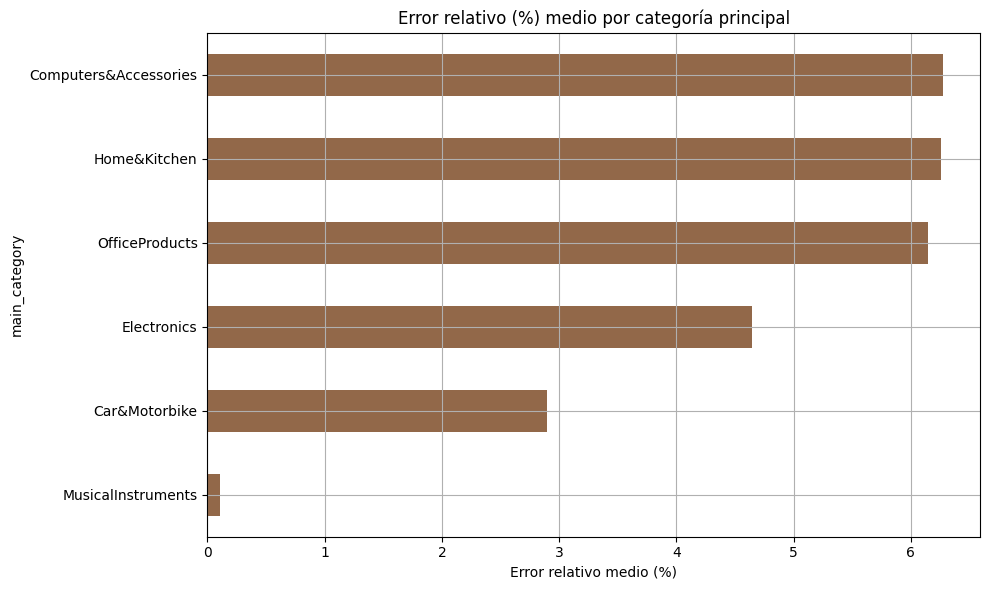

In [51]:
errores_por_categoria["Error relativo (%)"] = (
    np.abs(errores_por_categoria["Precio real"] - errores_por_categoria["Precio predicho"]) / errores_por_categoria["Precio real"]) * 100

error_relativo_categoria = errores_por_categoria.groupby("main_category")["Error relativo (%)"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
error_relativo_categoria.plot(kind='barh',color="#926849")
plt.xlabel("Error relativo medio (%)")
plt.title("Error relativo (%) medio por categoría principal")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
mae = mean_absolute_error(y_test, y_pred_opt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_opt))
r2 = r2_score(y_test, y_pred_opt)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

MAE: 234.49
RMSE: 918.79
R²: 0.9899


In [62]:
import os
import joblib
os.makedirs("src/models", exist_ok=True)
# Guardar el modelo entrenado como archivo .joblib
joblib.dump(best_gb_model, "src/models/gb_model.joblib")

['src/models/gb_model.joblib']